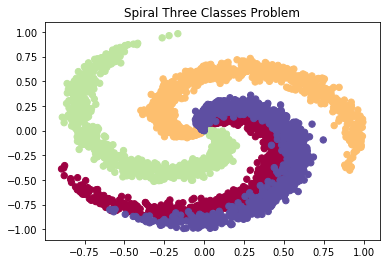

In [1]:
# Run code with tensorflow version 1.x
%tensorflow_version 1.x

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
#generate random data -- not linearly separable 
np.random.seed(0)
N = 1000 # number of points per class
D = 2 # dimensionality
num_classes = 4 # number of classes
X = np.zeros((N*num_classes,D))
num_train_examples = X.shape[0]
y = np.zeros(N*num_classes, dtype='uint8')
for j in range(num_classes):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
    
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.title('Spiral Three Classes Problem')
plt.show()


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

y_train = keras.utils.to_categorical(y_train,num_classes)
y_val = keras.utils.to_categorical(y_val,num_classes)

In [0]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [3]:
#The current model seems to stop without success.
#Can you improve the performance keeping same number of neurons and layers? 

#Try different better set of parameters in the SGD optimizer:
#a. OPTIMIZER=keras.optimizers.SGD(learning_rate=.75,decay=.1)
#b. OPTIMIZER=keras.optimizers.SGD(learning_rate=.0001)
#c. OPTIMIZER=keras.optimizers.SGD(learning_rate=1)
#d. OPTIMIZER=keras.optimizers.SGD(learning_rate=.01)
#e. OPTIMIZER=keras.optimizers.SGD(learning_rate=.01,momentum=.9, nesterov=False)
#f. OPTIMIZER=keras.optimizers.SGD(learning_rate=.01,momentum=.9, nesterov=True)
#Try different optimizers:
#d. OPTIMIZER=keras.optimizers.Adam(learning_rate=.01)
#e. OPTIMIZER=keras.optimizers.Nadam(learning_rate=.01)
#Are activation function important?:
#f.  Use Dense(5) instead of Dense(5,activation='relu')

OPTIMIZER=keras.optimizers.SGD(learning_rate=.75)
input_vec=Input(shape=(D,))
x=Dense(5,activation='relu')(input_vec) 
x2=Dense(5,activation='relu')(x) 
x_out=Dense(num_classes, activation='softmax')(x2)
model=Model(inputs=input_vec,outputs=x_out)
model.summary()
model.compile(optimizer=OPTIMIZER,loss=keras.losses.CategoricalCrossentropy())



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 24        
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


In [0]:
from functools import reduce
from tensorflow.keras.callbacks import LambdaCallback
parameters_value=[]
save_weights = LambdaCallback(on_epoch_end=lambda 
                               batch, logs: parameters_value.append(reduce(lambda x, y: np.concatenate([np.ndarray.flatten(x),np.ndarray.flatten(y)],axis=0), model.get_weights())))


In [0]:
history=model.fit(X_train,y_train,epochs=100,batch_size=24,callbacks=[save_weights],validation_data=[X_val,y_val])

Train on 2680 samples, validate on 1320 samples
Epoch 1/100
2680/2680 [==============================] - 10s 4ms/sample - loss: 1.2483 - val_loss: 1.0616
Epoch 2/100
2680/2680 [==============================] - 0s 131us/sample - loss: 1.0548 - val_loss: 1.2961
Epoch 3/100
2680/2680 [==============================] - 0s 129us/sample - loss: 1.0508 - val_loss: 0.9061
Epoch 4/100
2680/2680 [==============================] - 0s 133us/sample - loss: 1.0395 - val_loss: 1.0234
Epoch 5/100
2680/2680 [==============================] - 0s 136us/sample - loss: 1.0040 - val_loss: 1.0256
Epoch 6/100
2680/2680 [==============================] - 0s 128us/sample - loss: 0.9473 - val_loss: 1.2712
Epoch 7/100
2680/2680 [==============================] - 0s 129us/sample - loss: 0.9781 - val_loss: 0.9971
Epoch 8/100
2680/2680 [==============================] - 0s 130us/sample - loss: 0.9587 - val_loss: 0.7841
Epoch 9/100
2680/2680 [==============================] - 0s 130us/sample - loss: 1.0033 - val_los

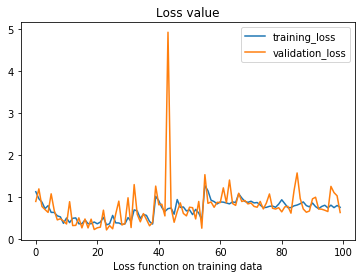

In [0]:
plt.title("Loss value")
plt.plot(history.history['loss'],label='training_loss')
plt.plot(history.history['val_loss'],label='validation_loss')
plt.legend()
plt.xlabel('Number of Epochs')
plt.xlabel('Loss function on training data')
plt.show()

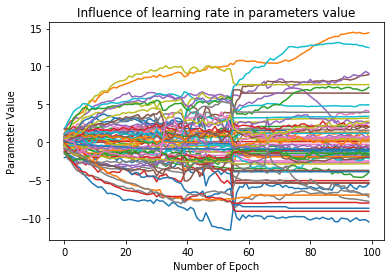

In [0]:
plt.title("Influence of learning rate in parameters value")
plt.plot(parameters_value)
plt.xlabel('Number of Epoch')
plt.ylabel('Parameter Value')
plt.show()

## **Question 1: What is the relation between parameter value and learning rate?**

Answer here!

In [0]:
parameters_value=np.array(parameters_value)

(0, 0.5)

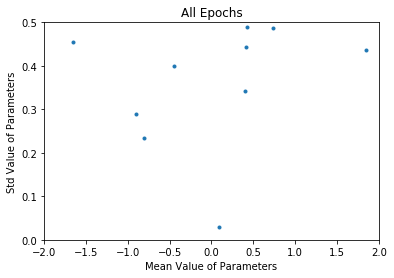

In [0]:
plt.plot(np.mean(parameters_value,axis=0),np.std(parameters_value,axis=0),'.')
plt.xlabel('Mean Value of Parameters')
plt.ylabel('Std Value of Parameters')
plt.title('All Epochs')
plt.xlim(-2,2)
plt.ylim(0,.5)

##**Question 2: Plot mean and variance of parameters over the epochs**

In [0]:
# Answer here!

#Visualize classification map:

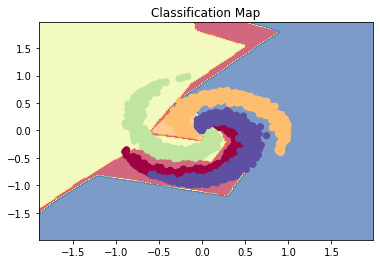

In [0]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
X_ = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(X_)
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Classification Map')
plt.show()